<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3><h4>Leong Kai En, Matthew (S10204010C)</h4></th>
    </tr>
</table>

<a id="top"></a>

<h2> Code </h2> <a id="top"></a>

[Go to Report](#report)

[Go to other methods (Not used)](#methods)

In [1]:
# import the packages
import pandas as pd
import numpy as np

#Plotting visuals
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats #For Q-Q plots

#Sklearn process for train test split
from sklearn.model_selection import train_test_split

#Missing Value Imputation
from sklearn.pipeline import Pipeline
import feature_engine.imputation as mdi

#Categorical Data Encoding
from feature_engine.encoding import OrdinalEncoder 

#Power Transformation
from sklearn.pipeline import Pipeline
from feature_engine.transformation import PowerTransformer

#Variable Discretisation/Binning
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualWidthDiscretiser

#Feature Engineer
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

#Naive Baseline Model
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

## 1.1: Load


In [2]:
data_driver = pd.read_csv('./datasets/f1db_csv_mod/drivers_mod.csv')
data_pitstops =  pd.read_csv('./datasets/f1db_csv_mod/pit_stops_mod.csv')
data_qualifying =  pd.read_csv('./datasets/f1db_csv_mod/qualifying_mod.csv')
data_races =  pd.read_csv('./datasets/f1db_csv_mod/races_mod.csv')
data_results =  pd.read_csv('./datasets/f1db_csv_mod/results_mod.csv')
data_status = pd.read_csv('./datasets/f1db_csv_mod/status_mod.csv')


'''
Target: Position column from data_results
'''

'\nTarget: Position column from data_results\n'

## 1.2 Copy of Dataset

In [3]:
#Copies of data set in case
data_driver_copy = pd.read_csv('./datasets/f1db_csv_mod/drivers_mod.csv')
data_pitstops_copy =  pd.read_csv('./datasets/f1db_csv_mod/pit_stops_mod.csv')
data_qualifying_copy =  pd.read_csv('./datasets/f1db_csv_mod/qualifying_mod.csv')
data_races_copy =  pd.read_csv('./datasets/f1db_csv_mod/races_mod.csv')
data_results_copy =  pd.read_csv('./datasets/f1db_csv_mod/results_mod.csv')
data_status_copy = pd.read_csv('./datasets/f1db_csv_mod/status_mod.csv')

## Step 2: Data Wrangling on multiple tables 
[Back to top](#top)

### 2.1 Data_Drivers Data 

In [4]:
#Boolean masking to help get the driver in question
data_driver = data_driver[data_driver["driverId"]==1]
data_driver

#Dropping URL column which is only used for self-referencing & context
data_driver = data_driver.drop("url", axis=1) #Dropping the url column
data_driver

,driverId,driverRef,number,code,forename,surname,dob,nationality
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British


### 2.2 Data_Pitstops Data 

In [5]:
#Boolean masking to help get the driver in question
data_pitstops = data_pitstops[data_pitstops["driverId"]==1]
data_pitstops

,raceId,driverId,stop,lap,time,duration,milliseconds
11,841,1,1,16,17:28:24,23.227,23227
33,841,1,2,36,17:59:29,23.199,23199
49,842,1,1,12,16:24:40,22.552,22552
72,842,1,2,24,16:45:48,22.611,22611
89,842,1,3,37,17:08:28,25.382,25382
...,...,...,...,...,...,...,...
8748,1051,1,2,42,18:05:37,25.381,25381
8754,1072,1,1,10,20:49:49,20.580,20580
8762,1072,1,2,13,20:58:32,16:35.856,995856
8782,1072,1,3,15,21:22:02,18:06.674,1086674


### 2.3 Data_Qualifying Data 

In [6]:
#Boolean masking to help get the driver in question
data_qualifying = data_qualifying[data_qualifying["driverId"]==1]
data_qualifying

#Renamed position to qualifying position to mitigate confusion
data_qualifying.rename(columns = {'position': 'qualifying_position'}, inplace = True)
data_qualifying

,qualifyId,raceId,driverId,constructorId,number,qualifying_position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
25,26,19,1,1,22,4,1:35.392,1:34.627,1:36.709
46,47,20,1,1,22,3,1:32.750,1:31.922,1:33.292
70,71,21,1,1,22,5,1:21.366,1:20.825,1:22.096
90,91,22,1,1,22,3,1:26.192,1:26.477,1:27.923
...,...,...,...,...,...,...,...,...,...
9036,9077,1070,1,131,44,2,1:17.207,1:16.474,1:16.020
9055,9096,1071,1,131,44,1,1:08.733,1:08.068,1:07.934
9075,9116,1051,1,131,44,1,1:21.901,1:21.682,1:20.827
9095,9136,1072,1,131,44,1,1:28.466,1:27.712,1:27.511


### 2.4 Data_Races Data 

In [7]:
#Dropping URL column which is only used for self-referencing & context
data_races = data_races.drop("url", axis=1) #Dropping the url column
data_races

,raceId,round,circuitId,name,date,time
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00
...,...,...,...,...,...,...
1075,1092,19,22,Japanese Grand Prix,10/9/2022,5:10:00
1076,1093,20,69,United States Grand Prix,10/23/2022,19:00:00
1077,1094,21,32,Mexico City Grand Prix,10/30/2022,19:00:00
1078,1095,22,18,São Paulo Grand Prix,11/13/2022,17:00:00


### 2.5 Data_Results Data 

In [8]:
#Boolean masking to help get the driver in question
data_results = data_results[data_results["driverId"]==1]

#Dropped columns that cannot be used to predict as they happened during the 
#course of the race
data_results = data_results.drop("positionText", axis=1)
data_results = data_results.drop("positionOrder", axis=1)
data_results = data_results.drop("points", axis=1)
data_results = data_results.drop("laps", axis=1)
data_results = data_results.drop("time", axis=1)
data_results = data_results.drop("milliseconds", axis=1)
data_results = data_results.drop("fastestLap", axis=1)
data_results = data_results.drop("rank", axis=1)
data_results = data_results.drop("fastestLapTime", axis=1)
data_results = data_results.drop("fastestLapSpeed", axis=1)

data_results

#Target would be the position column which could be set later after merging of tables

,resultId,raceId,driverId,constructorId,number,grid,position,statusId
0,1,18,1,1,22,1,1,1
26,27,19,1,1,22,9,5,1
56,57,20,1,1,22,3,13,11
68,69,21,1,1,22,5,3,1
89,90,22,1,1,22,3,2,1
...,...,...,...,...,...,...,...,...
25301,25307,1070,1,131,44,2,2,1
25320,25326,1071,1,131,44,10,99,1
25340,25346,1051,1,131,44,1,99,1
25360,25366,1072,1,131,44,1,99,1


### 2.6 Merging of Tables

In [9]:
df = pd.merge(data_driver,data_pitstops,on='driverId',how='inner')
df = pd.merge(df,data_qualifying,on='driverId',how='inner')
df = pd.merge(df,data_results,on='driverId',how='inner')
df = pd.merge(df,data_races,on='raceId',how='inner')

In [10]:
df.drop_duplicates()

,driverId,driverRef,number_x,code,forename,surname,dob,nationality,raceId_x,stop,...,constructorId_y,number,grid,position,statusId,round,circuitId,name,date,time_y
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,841,1,...,1,22,1,1,1,1,1,Australian Grand Prix,3/16/2008,4:30:00
1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,841,1,...,1,22,1,1,1,1,1,Australian Grand Prix,3/16/2008,4:30:00
2,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,841,1,...,1,22,1,1,1,1,1,Australian Grand Prix,3/16/2008,4:30:00
3,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,841,1,...,1,22,1,1,1,1,1,Australian Grand Prix,3/16/2008,4:30:00
4,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,841,1,...,1,22,1,1,1,1,1,Australian Grand Prix,3/16/2008,4:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35748859,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,1073,1,...,131,44,2,2,1,22,24,Abu Dhabi Grand Prix,12/12/2021,13:00:00
35748860,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,1073,1,...,131,44,2,2,1,22,24,Abu Dhabi Grand Prix,12/12/2021,13:00:00
35748861,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,1073,1,...,131,44,2,2,1,22,24,Abu Dhabi Grand Prix,12/12/2021,13:00:00
35748862,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,1073,1,...,131,44,2,2,1,22,24,Abu Dhabi Grand Prix,12/12/2021,13:00:00


### 2.7 Extract and Create Features from Different Tables

In [11]:
#Renaming columns for clarity and to reduce duplications
df.rename(columns = {'number_x': 'driver_number'}, inplace = True)
df.rename(columns = {'cozde': 'driver_code'}, inplace = True)
df.rename(columns = {'stop': 'stop_number'}, inplace = True)
df.rename(columns = {'duration': 'duration_of_stop'}, inplace = True)
df.rename(columns = {'time_x': 'time_of_pitStop'}, inplace = True)
df.rename(columns = {'time_y': 'time_of_race'}, inplace = True)
df.rename(columns = {'constructorId_x': 'constructorId'}, inplace = True)
df.rename(columns = {'name': 'race_name'}, inplace = True)
df.rename(columns = {'date': 'race_date'}, inplace = True)

#Dropping columns for clarity and reduction of duplications
df = df.drop("number_y", axis=1) #Repeated
df = df.drop("number", axis=1) #Repeated
df = df.drop("raceId_x", axis=1) #Repeated
df = df.drop("raceId_y", axis=1) #Repeated
df = df.drop("constructorId_y", axis=1) #Repeated

df = df.drop("driverId", axis=1) #Constant throughout
df = df.drop("driverRef", axis=1) #Constant throughout
df = df.drop("driver_number", axis=1) #Constant throughout
df = df.drop("code", axis=1) #Constant throughout
df = df.drop("forename", axis=1) #Constant throughout
df = df.drop("surname", axis=1) #Constant throughout
df = df.drop("dob", axis=1) #Constant throughout
df = df.drop("nationality", axis=1) #Constant throughout
df = df.drop("milliseconds", axis=1) #Same as duration of pitstops
df = df.drop("time_of_pitStop", axis=1) #Not needed
df = df.drop("q1", axis=1) #Not needed
df = df.drop("q2", axis=1) #Not needed
df = df.drop("q3", axis=1) #Not needed

In [12]:
df.dtypes

stop_number             int64
lap                     int64
duration_of_stop       object
qualifyId               int64
constructorId           int64
qualifying_position     int64
resultId                int64
raceId                  int64
grid                    int64
position               object
statusId                int64
round                   int64
circuitId               int64
race_name              object
race_date              object
time_of_race           object
dtype: object

In [13]:
df.dtypes

stop_number             int64
lap                     int64
duration_of_stop       object
qualifyId               int64
constructorId           int64
qualifying_position     int64
resultId                int64
raceId                  int64
grid                    int64
position               object
statusId                int64
round                   int64
circuitId               int64
race_name              object
race_date              object
time_of_race           object
dtype: object

In [14]:
df['time_of_race'] = pd.to_datetime(df['time_of_race'])

In [15]:
#Replace the data irregularities in race_data
df['race_date'] = df['race_date'].replace('4/5/12009', '4/5/2009')
df['race_date'] = df['race_date'].replace('6/7/12009', '6/7/2009')
df['race_date'] = df['race_date'].replace('7/10/12011', '7/10/2011')
df['race_date'] = df['race_date'].replace('4/12/12015', '4/12/2015')
df['race_date'] = df['race_date'].replace('11/1/12015', '11/1/2015')
df['race_date'] = df['race_date'].replace('10/29/12017', '10/29/2017')
df['race_date'] = df['race_date'].replace('4/5/12009', '4/5/2009')
df['race_date'] = df['race_date'].replace('9/16/12018', '9/16/2018')
df['race_date'] = df['race_date'].replace('8/30/12020', '8/30/2020')
df['race_date'] = df['race_date'].replace('4/18/12021', '4/18/2021')

In [16]:
df['race_date'] = pd.to_datetime(df['race_date'])

In [17]:
df.dtypes

stop_number                     int64
lap                             int64
duration_of_stop               object
qualifyId                       int64
constructorId                   int64
qualifying_position             int64
resultId                        int64
raceId                          int64
grid                            int64
position                       object
statusId                        int64
round                           int64
circuitId                       int64
race_name                      object
race_date              datetime64[ns]
time_of_race           datetime64[ns]
dtype: object

In [18]:
df['time_of_race'] = df['time_of_race'].dt.time

In [19]:
#Features from Dates & times
df['race_year'] = df['race_date'].dt.year
df['race_month'] = df['race_date'].dt.month
df['race_quarter'] = df['race_date'].dt.quarter


In [20]:
df['duration_of_stop'].unique()

array(['23.227', '23.199', '22.552', '22.611', '25.382', '22.466',
       '20.878', '20.533', '20.567', '20.833', '21.075', '35.688',
       '22.041', '19.761', '20.235', '20.473', '20.988', '31.445',
       '19.347', '26.977', '20.340', '21.035', '20.212', '25.100',
       '24.065', '23.340', '20.982', '20.496', '20.403', '21.880',
       '20.803', '20.861', '20.855', '21.628', '13.173', '21.895',
       '22.083', '21.876', '30.142', '33.456', '24.342', '30.706',
       '29.876', '21.091', '22.821', '21.292', '20.846', '20.584',
       '22.530', '27.193', '22.172', '19.439', '19.350', '21.099',
       '20.396', '20.681', '22.862', '23.464', '24.271', '27.961',
       '26.338', '20.177', '20.903', '20.691', '28.341', '30.622',
       '23.696', '21.963', '19.980', '25.748', '21.375', '19.355',
       '31.081', '24.498', '25.003', '21.012', '17.598', '18.877',
       '20.436', '19.059', '20.736', '29.124', '21.148', '19.794',
       '19.638', '20.777', '19.447', '20.852', '20.814', '24.4

In [21]:
#Replacing Duration Values
df['duration_of_stop'] = df['duration_of_stop'].replace('18:57.295', '1137.295')
df['duration_of_stop'] = df['duration_of_stop'].replace('18:10.087', '1090.087')
df['duration_of_stop'] = df['duration_of_stop'].replace('16:40.478', '1000.478')
df['duration_of_stop'] = df['duration_of_stop'].replace('33:30.361', '2010.361')
df['duration_of_stop'] = df['duration_of_stop'].replace('24:42.048', '1482.048')
df['duration_of_stop'] = df['duration_of_stop'].replace('21:50.768', '1310.768')
df['duration_of_stop'] = df['duration_of_stop'].replace('25:16.864', '1516.864')
df['duration_of_stop'] = df['duration_of_stop'].replace('23:56.696', '1436.696')
df['duration_of_stop'] = df['duration_of_stop'].replace('21:40.911', '1300.911')
df['duration_of_stop'] = df['duration_of_stop'].replace('19:23.979', '1163.979')
df['duration_of_stop'] = df['duration_of_stop'].replace('24:54.731', '1494.731')
df['duration_of_stop'] = df['duration_of_stop'].replace('1:05.870', '65.870')
df['duration_of_stop'] = df['duration_of_stop'].replace('33:20.923', '2000.923')
df['duration_of_stop'] = df['duration_of_stop'].replace('34:08.376', '2048.376')
df['duration_of_stop'] = df['duration_of_stop'].replace('24:09.259', '1449.259')
df['duration_of_stop'] = df['duration_of_stop'].replace('16:35.856', '995.856')
df['duration_of_stop'] = df['duration_of_stop'].replace('18:06.674', '995.856')

df['duration_of_stop'] = df['duration_of_stop'].astype(float)

In [22]:
df

,stop_number,lap,duration_of_stop,qualifyId,constructorId,qualifying_position,resultId,raceId,grid,position,statusId,round,circuitId,race_name,race_date,time_of_race,race_year,race_month,race_quarter
0,1,16,23.227,1,1,1,1,18,1,1,1,1,1,Australian Grand Prix,2008-03-16,04:30:00,2008.0,3.0,1.0
1,1,16,23.227,26,1,4,1,18,1,1,1,1,1,Australian Grand Prix,2008-03-16,04:30:00,2008.0,3.0,1.0
2,1,16,23.227,47,1,3,1,18,1,1,1,1,1,Australian Grand Prix,2008-03-16,04:30:00,2008.0,3.0,1.0
3,1,16,23.227,71,1,5,1,18,1,1,1,1,1,Australian Grand Prix,2008-03-16,04:30:00,2008.0,3.0,1.0
4,1,16,23.227,91,1,3,1,18,1,1,1,1,1,Australian Grand Prix,2008-03-16,04:30:00,2008.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35748859,1,14,21.595,9077,131,2,25387,1073,2,2,1,22,24,Abu Dhabi Grand Prix,2021-12-12,13:00:00,2021.0,12.0,4.0
35748860,1,14,21.595,9096,131,1,25387,1073,2,2,1,22,24,Abu Dhabi Grand Prix,2021-12-12,13:00:00,2021.0,12.0,4.0
35748861,1,14,21.595,9116,131,1,25387,1073,2,2,1,22,24,Abu Dhabi Grand Prix,2021-12-12,13:00:00,2021.0,12.0,4.0
35748862,1,14,21.595,9136,131,1,25387,1073,2,2,1,22,24,Abu Dhabi Grand Prix,2021-12-12,13:00:00,2021.0,12.0,4.0


### 2.8 Filtering to decrease the size of dataset

Originally there were 35 million rows of data. However, dataset was size limited to 600,000 rows of data due to hardware limitation

In [23]:
#Subset to subset the dataset to 600k rows of data
df = df.loc[0:600000]

In [24]:
df

,stop_number,lap,duration_of_stop,qualifyId,constructorId,qualifying_position,resultId,raceId,grid,position,statusId,round,circuitId,race_name,race_date,time_of_race,race_year,race_month,race_quarter
0,1,16,23.227,1,1,1,1,18,1,1,1,1,1,Australian Grand Prix,2008-03-16,04:30:00,2008.0,3.0,1.0
1,1,16,23.227,26,1,4,1,18,1,1,1,1,1,Australian Grand Prix,2008-03-16,04:30:00,2008.0,3.0,1.0
2,1,16,23.227,47,1,3,1,18,1,1,1,1,1,Australian Grand Prix,2008-03-16,04:30:00,2008.0,3.0,1.0
3,1,16,23.227,71,1,5,1,18,1,1,1,1,1,Australian Grand Prix,2008-03-16,04:30:00,2008.0,3.0,1.0
4,1,16,23.227,91,1,3,1,18,1,1,1,1,1,Australian Grand Prix,2008-03-16,04:30:00,2008.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599996,1,13,28.805,5039,1,2,90,22,3,2,1,5,5,Turkish Grand Prix,2008-05-11,12:00:00,2008.0,5.0,2.0
599997,1,13,28.805,5062,1,1,90,22,3,2,1,5,5,Turkish Grand Prix,2008-05-11,12:00:00,2008.0,5.0,2.0
599998,1,13,28.805,5089,1,4,90,22,3,2,1,5,5,Turkish Grand Prix,2008-05-11,12:00:00,2008.0,5.0,2.0
599999,1,13,28.805,5110,1,2,90,22,3,2,1,5,5,Turkish Grand Prix,2008-05-11,12:00:00,2008.0,5.0,2.0


## Step 3: Data Cleansing and Transformation
[Back to top](#top)

### 3.1 Overview of Consolidated DataFrame Variable

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600001 entries, 0 to 600000
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   stop_number          600001 non-null  int64         
 1   lap                  600001 non-null  int64         
 2   duration_of_stop     600001 non-null  float64       
 3   qualifyId            600001 non-null  int64         
 4   constructorId        600001 non-null  int64         
 5   qualifying_position  600001 non-null  int64         
 6   resultId             600001 non-null  int64         
 7   raceId               600001 non-null  int64         
 8   grid                 600001 non-null  int64         
 9   position             600001 non-null  object        
 10  statusId             600001 non-null  int64         
 11  round                600001 non-null  int64         
 12  circuitId            600001 non-null  int64         
 13  race_name     

In [26]:
df.describe()

,stop_number,lap,duration_of_stop,qualifyId,constructorId,qualifying_position,resultId,raceId,grid,statusId,round,circuitId,race_year,race_month,race_quarter
count,600001.000000,600001.000000,600001.000000,600001.000000,600001.000000,600001.000000,600001.000000,600001.000000,600001.000000,600001.000000,600001.000000,600001.000000,600001.0,600001.000000,600001.000000
mean,1.806879,26.417418,69.606035,5671.855402,81.334233,3.350856,47.382791,19.931203,4.241278,3.068797,2.931203,2.931203,2008.0,3.758722,1.586241
std,1.006055,14.538664,255.462057,2566.860796,63.165402,3.971169,30.985482,1.387975,2.749899,4.050688,1.387975,1.387975,0.0,0.726654,0.492507
min,1.000000,1.000000,13.173000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,2008.0,3.000000,1.000000
25%,1.000000,15.000000,21.355000,4538.000000,1.000000,1.000000,27.000000,19.000000,3.000000,1.000000,2.000000,2.000000,2008.0,3.000000,1.000000
50%,2.000000,26.000000,22.862000,6193.000000,131.000000,2.000000,57.000000,20.000000,3.000000,1.000000,3.000000,3.000000,2008.0,4.000000,2.000000
75%,2.000000,37.000000,24.595000,7680.000000,131.000000,4.000000,69.000000,21.000000,5.000000,1.000000,4.000000,4.000000,2008.0,4.000000,2.000000
max,6.000000,70.000000,2048.376000,9157.000000,131.000000,22.000000,90.000000,22.000000,9.000000,11.000000,5.000000,5.000000,2008.0,5.000000,2.000000


In [28]:
df.isnull().mean().sort_values()

stop_number            0.0
race_year              0.0
time_of_race           0.0
race_date              0.0
race_name              0.0
circuitId              0.0
round                  0.0
statusId               0.0
race_month             0.0
position               0.0
raceId                 0.0
resultId               0.0
qualifying_position    0.0
constructorId          0.0
qualifyId              0.0
duration_of_stop       0.0
lap                    0.0
grid                   0.0
race_quarter           0.0
dtype: float64

In [29]:
#Numerical variables
num_cols = [c for c in df.columns if df[c].dtypes !='O']
num_cols

['stop_number',
 'lap',
 'duration_of_stop',
 'qualifyId',
 'constructorId',
 'qualifying_position',
 'resultId',
 'raceId',
 'grid',
 'statusId',
 'round',
 'circuitId',
 'race_date',
 'race_year',
 'race_month',
 'race_quarter']

In [30]:
#Categorical variables
cat_cols = [c for c in df.columns if df[c].dtypes =='O']
cat_cols

['position', 'race_name', 'time_of_race']

### 3.2 Categorical Data


In [31]:
df['race_name'].unique()

array(['Australian Grand Prix', 'Malaysian Grand Prix',
       'Bahrain Grand Prix', 'Spanish Grand Prix', 'Turkish Grand Prix'],
      dtype=object)

In [32]:
df['time_of_race'].unique()

array([datetime.time(4, 30), datetime.time(7, 0), datetime.time(11, 30),
       datetime.time(12, 0)], dtype=object)

### 3.3 Exploring Numerical Variables

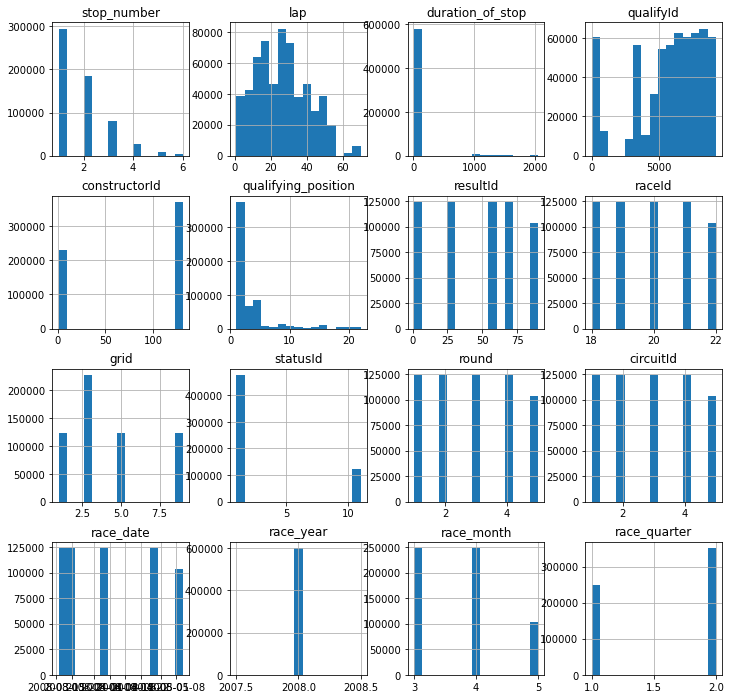

In [33]:
df[num_cols].hist(bins=15, figsize=(12,12))
plt.show()

### 3.4 Numerical Data

In [34]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [35]:
#Numerical variables
num_cols

['stop_number',
 'lap',
 'duration_of_stop',
 'qualifyId',
 'constructorId',
 'qualifying_position',
 'resultId',
 'raceId',
 'grid',
 'statusId',
 'round',
 'circuitId',
 'race_date',
 'race_year',
 'race_month',
 'race_quarter']

### 3.5 Exploring the Data Further (Outlier)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


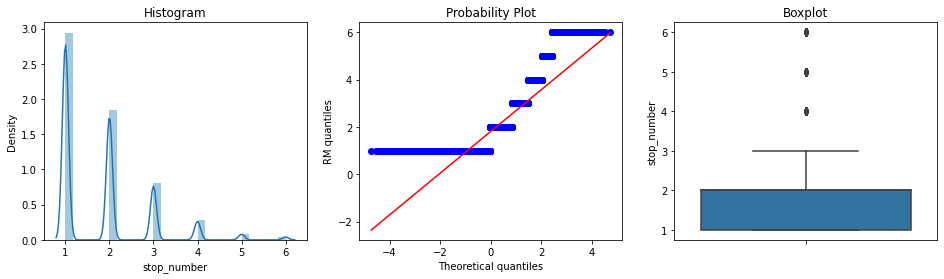

In [36]:
#Outliers for stop_number
diagnostic_plots(df, 'stop_number')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


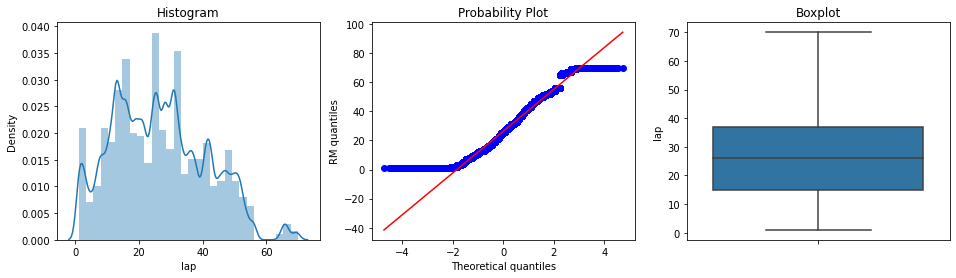

In [37]:
#Outliers for lap
diagnostic_plots(df, 'lap')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


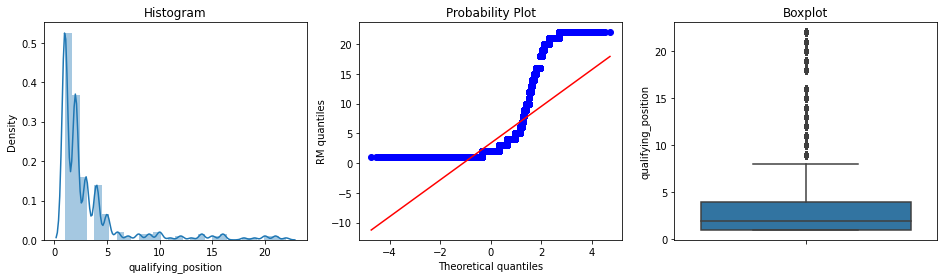

In [38]:
#Outliers for qualifying_position
diagnostic_plots(df, 'qualifying_position')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


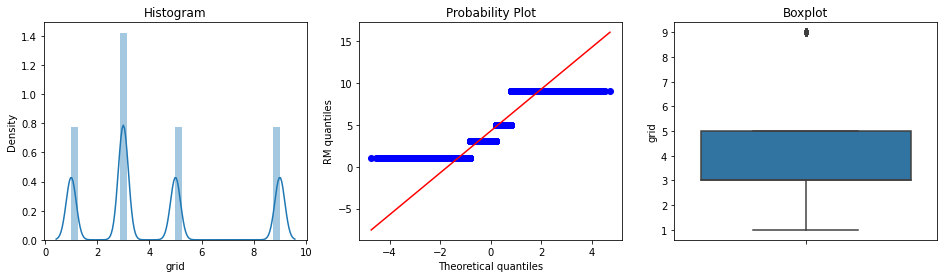

In [39]:
#Outliers for grid
diagnostic_plots(df, 'grid')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


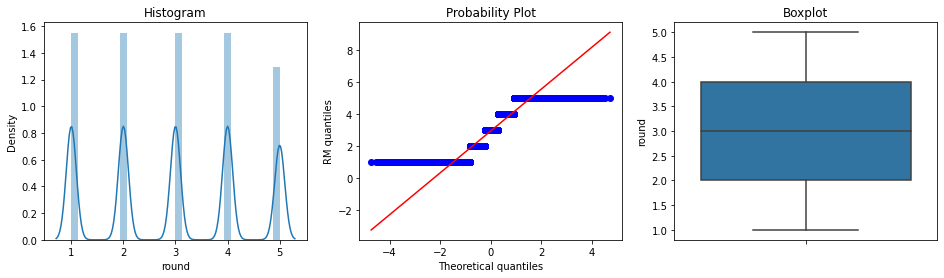

In [40]:
#Outliers for round
diagnostic_plots(df, 'round')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


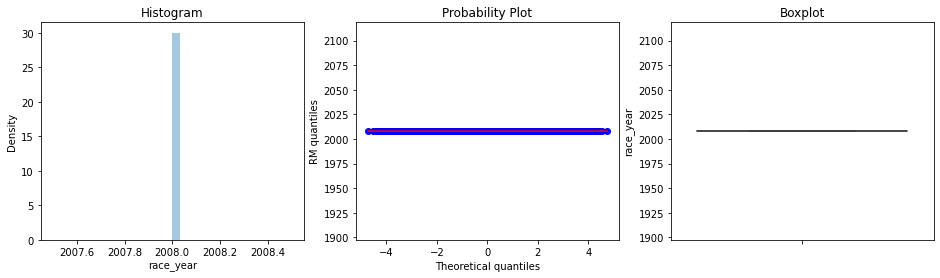

In [41]:
#Outliers for race_year
diagnostic_plots(df, 'race_year')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


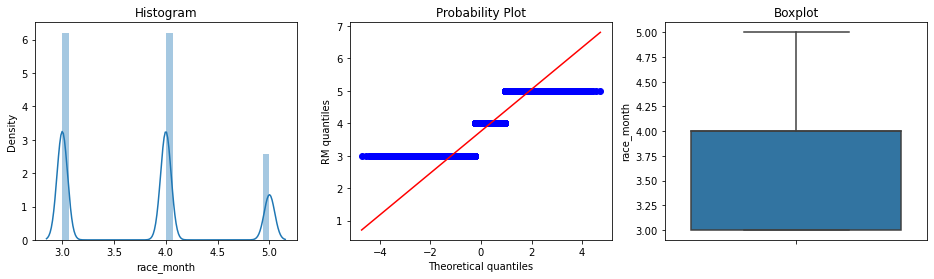

In [42]:
#Outliers for race_month
diagnostic_plots(df, 'race_month')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


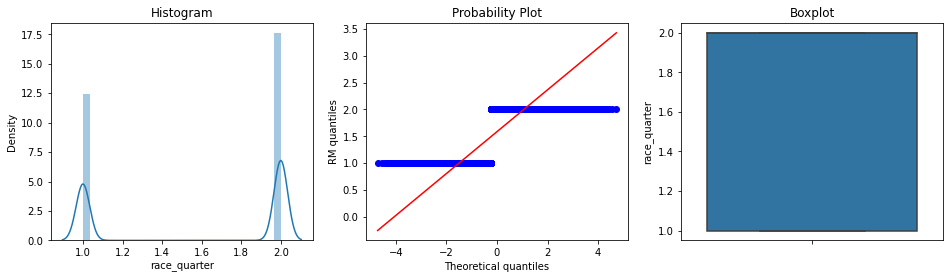

In [43]:
#Outliers for race_quarter
diagnostic_plots(df, 'race_quarter')

In [44]:
'''
#Outliers can be left alone so this may not be neccessary
windsorizer = Winsorizer(capping_method ='gaussian', 
                        tail='right', # cap left, right or both tails
                        fold =0.05,
                        variables=['stop_number') #Change where neccesary

windsorizer.fit(df)
df = windsorizer.transform(df)
'''

"\n#Outliers can be left alone so this may not be neccessary\nwindsorizer = Winsorizer(capping_method ='gaussian', \n                        tail='right', # cap left, right or both tails\n                        fold =0.05,\n                        variables=['stop_number') #Change where neccesary\n\nwindsorizer.fit(df)\ndf = windsorizer.transform(df)\n"

### 4. Missing Value Imputation
[Back to top](#top)

In [45]:
num_cols

['stop_number',
 'lap',
 'duration_of_stop',
 'qualifyId',
 'constructorId',
 'qualifying_position',
 'resultId',
 'raceId',
 'grid',
 'statusId',
 'round',
 'circuitId',
 'race_date',
 'race_year',
 'race_month',
 'race_quarter']

In [46]:
cat_cols

['position', 'race_name', 'time_of_race']

In [47]:
df.dtypes

stop_number                     int64
lap                             int64
duration_of_stop              float64
qualifyId                       int64
constructorId                   int64
qualifying_position             int64
resultId                        int64
raceId                          int64
grid                            int64
position                       object
statusId                        int64
round                           int64
circuitId                       int64
race_name                      object
race_date              datetime64[ns]
time_of_race                   object
race_year                     float64
race_month                    float64
race_quarter                  float64
dtype: object

In [48]:
df.isnull().mean().sort_values

<bound method Series.sort_values of stop_number            0.0
lap                    0.0
duration_of_stop       0.0
qualifyId              0.0
constructorId          0.0
qualifying_position    0.0
resultId               0.0
raceId                 0.0
grid                   0.0
position               0.0
statusId               0.0
round                  0.0
circuitId              0.0
race_name              0.0
race_date              0.0
time_of_race           0.0
race_year              0.0
race_month             0.0
race_quarter           0.0
dtype: float64>

### 4.1 Pipeline Imputation

In [49]:
#List of numerical vars (X train/test)
features_num_arbitrary = ['race_quarter']
features_num_median = ['race_year', 'race_month']

#List of categorical vars (X train/test)
features_cat_missing = ['position']


In [50]:
#Practical 2.10 (X train/test)

pipe = Pipeline(steps=[
    ('imp_num_arbitrary', mdi.ArbitraryNumberImputer(variables = features_num_arbitrary)),
    ('imp_num_median', mdi.MeanMedianImputer(imputation_method = 'median', variables=features_num_median)),
    #('imp_cat_frequent', mdi.CategoricalImputer(variables = features_cat_frequent, imputation_method='frequent')),
    ('imp_cat_missing', mdi.CategoricalImputer(variables=features_cat_missing, imputation_method='missing'))
])

pipe.fit(df)
df = pipe.transform(df)

### 4.2 Complete Case Analysis (CCA)

In [51]:
#Dropping the missing dates in race_date & time_between_race
df = df.dropna()

In [52]:
df.isnull().mean().sort_values()

stop_number            0.0
race_year              0.0
time_of_race           0.0
race_date              0.0
race_name              0.0
circuitId              0.0
round                  0.0
statusId               0.0
race_month             0.0
position               0.0
raceId                 0.0
resultId               0.0
qualifying_position    0.0
constructorId          0.0
qualifyId              0.0
duration_of_stop       0.0
lap                    0.0
grid                   0.0
race_quarter           0.0
dtype: float64

In [53]:
#Not needed
df = df.drop(['race_date'], axis=1)
df = df.drop(['time_of_race'], axis=1)

df.head()

,stop_number,lap,duration_of_stop,qualifyId,constructorId,qualifying_position,resultId,raceId,grid,position,statusId,round,circuitId,race_name,race_year,race_month,race_quarter
0,1,16,23.227,1,1,1,1,18,1,1,1,1,1,Australian Grand Prix,2008.0,3.0,1.0
1,1,16,23.227,26,1,4,1,18,1,1,1,1,1,Australian Grand Prix,2008.0,3.0,1.0
2,1,16,23.227,47,1,3,1,18,1,1,1,1,1,Australian Grand Prix,2008.0,3.0,1.0
3,1,16,23.227,71,1,5,1,18,1,1,1,1,1,Australian Grand Prix,2008.0,3.0,1.0
4,1,16,23.227,91,1,3,1,18,1,1,1,1,1,Australian Grand Prix,2008.0,3.0,1.0


### 4.3 Changing Datatypes

In [54]:
#Convert position from object to int, convert after removing nan
df['position'] = df['position'].astype('int')


### 5.0 Train Test Split
[Back to top](#top)

In [55]:
df.shape

(600001, 17)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["position"], axis=1),
                                                    df[["position"]],
                                                    test_size=0.25, random_state=123)

In [57]:
X_train.shape, X_test.shape

((450000, 16), (150001, 16))

In [58]:
y_train.shape, y_test.shape

((450000, 1), (150001, 1))

### 6.0 Categorical Data Encoding
[Back to top](#top)

In [59]:
X_train['race_name'].unique()

array(['Bahrain Grand Prix', 'Spanish Grand Prix', 'Turkish Grand Prix',
       'Malaysian Grand Prix', 'Australian Grand Prix'], dtype=object)

In [60]:
vars_categorical = ['race_name']

ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=vars_categorical)

ordinal_enc.fit(X_train)
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)
X_train.head()

,stop_number,lap,duration_of_stop,qualifyId,constructorId,qualifying_position,resultId,raceId,grid,statusId,round,circuitId,race_name,race_year,race_month,race_quarter
283937,2,38,24.315,8518,131,1,57,20,3,11,3,3,0,2008.0,4.0,2.0
262868,3,45,22.172,7620,131,1,57,20,3,11,3,3,0,2008.0,4.0,2.0
432225,2,43,24.088,7880,131,1,69,21,5,1,4,4,1,2008.0,4.0,2.0
598908,1,27,21.729,6464,131,1,90,22,3,1,5,5,2,2008.0,5.0,2.0
257885,5,54,21.628,5797,131,4,57,20,3,11,3,3,0,2008.0,4.0,2.0


In [61]:
ordinal_enc.encoder_dict_

{'race_name': {'Bahrain Grand Prix': 0,
  'Spanish Grand Prix': 1,
  'Turkish Grand Prix': 2,
  'Malaysian Grand Prix': 3,
  'Australian Grand Prix': 4}}

### 6.1 Numerical Data Transformation

In [62]:
num_cols

['stop_number',
 'lap',
 'duration_of_stop',
 'qualifyId',
 'constructorId',
 'qualifying_position',
 'resultId',
 'raceId',
 'grid',
 'statusId',
 'round',
 'circuitId',
 'race_date',
 'race_year',
 'race_month',
 'race_quarter']

In [63]:
#Power transformation
pipe = Pipeline([
    ('power1', PowerTransformer(variables = ['stop_number'], exp=0.3)),    
    ('power2', PowerTransformer(variables = ['qualifying_position'], exp=0.4)),
    ('power3', PowerTransformer(variables = ['grid'], exp=0.5)),
     ])

pipe.fit(X_train)
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)
X_train.head()

,stop_number,lap,duration_of_stop,qualifyId,constructorId,qualifying_position,resultId,raceId,grid,statusId,round,circuitId,race_name,race_year,race_month,race_quarter
283937,1.231144,38,24.315,8518,131,1.000000,57,20,1.732051,11,3,3,0,2008.0,4.0,2.0
262868,1.390389,45,22.172,7620,131,1.000000,57,20,1.732051,11,3,3,0,2008.0,4.0,2.0
432225,1.231144,43,24.088,7880,131,1.000000,69,21,2.236068,1,4,4,1,2008.0,4.0,2.0
598908,1.000000,27,21.729,6464,131,1.000000,90,22,1.732051,1,5,5,2,2008.0,5.0,2.0
257885,1.620657,54,21.628,5797,131,1.741101,57,20,1.732051,11,3,3,0,2008.0,4.0,2.0


### 6.2 Variable Discretization/Binning

In [64]:
num_cols

['stop_number',
 'lap',
 'duration_of_stop',
 'qualifyId',
 'constructorId',
 'qualifying_position',
 'resultId',
 'raceId',
 'grid',
 'statusId',
 'round',
 'circuitId',
 'race_date',
 'race_year',
 'race_month',
 'race_quarter']

In [65]:
disc = EqualWidthDiscretiser(bins=20, variables = ['stop_number', 'lap', 'qualifying_position',
                                                   'grid'])
disc.fit(X_train)
train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

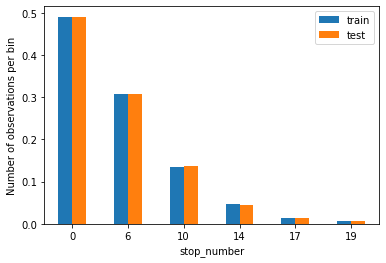

In [66]:
#stop_number
t1 = train_t.groupby(['stop_number'])['stop_number'].count() / len(train_t)
t2 = test_t.groupby(['stop_number'])['stop_number'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin');

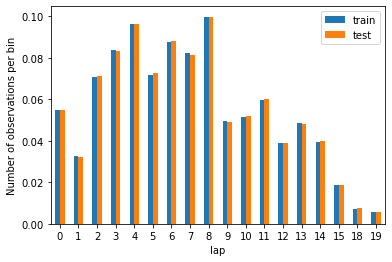

In [67]:
#lap
t1 = train_t.groupby(['lap'])['lap'].count() / len(train_t)
t2 = test_t.groupby(['lap'])['lap'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin');

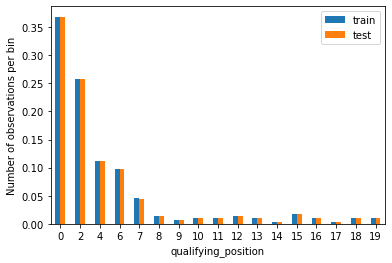

In [68]:
#qualifying_position
t1 = train_t.groupby(['qualifying_position'])['qualifying_position'].count() / len(train_t)
t2 = test_t.groupby(['qualifying_position'])['qualifying_position'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin');

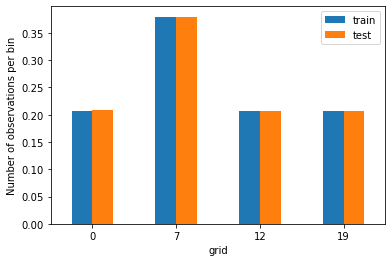

In [69]:
#grid
t1 = train_t.groupby(['grid'])['grid'].count() / len(train_t)
t2 = test_t.groupby(['grid'])['grid'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin');

### 6.3 Feature Engineering

In [70]:
X_train.dtypes

stop_number            float64
lap                      int64
duration_of_stop       float64
qualifyId                int64
constructorId            int64
qualifying_position    float64
resultId                 int64
raceId                   int64
grid                   float64
statusId                 int64
round                    int64
circuitId                int64
race_name                int64
race_year              float64
race_month             float64
race_quarter           float64
dtype: object

In [71]:
X_train #Delete once done

,stop_number,lap,duration_of_stop,qualifyId,constructorId,qualifying_position,resultId,raceId,grid,statusId,round,circuitId,race_name,race_year,race_month,race_quarter
283937,1.231144,38,24.315,8518,131,1.000000,57,20,1.732051,11,3,3,0,2008.0,4.0,2.0
262868,1.390389,45,22.172,7620,131,1.000000,57,20,1.732051,11,3,3,0,2008.0,4.0,2.0
432225,1.231144,43,24.088,7880,131,1.000000,69,21,2.236068,1,4,4,1,2008.0,4.0,2.0
598908,1.000000,27,21.729,6464,131,1.000000,90,22,1.732051,1,5,5,2,2008.0,5.0,2.0
257885,1.620657,54,21.628,5797,131,1.741101,57,20,1.732051,11,3,3,0,2008.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194278,1.000000,25,23.633,6664,131,1.319508,27,19,3.000000,1,2,2,3,2008.0,3.0,1.0
192476,1.000000,14,18.650,5039,1,1.319508,27,19,3.000000,1,2,2,3,2008.0,3.0,1.0
17730,1.390389,38,20.177,6585,131,1.319508,1,18,1.000000,1,1,1,4,2008.0,3.0,1.0
28030,1.390389,30,21.549,5089,1,1.741101,1,18,1.000000,1,1,1,4,2008.0,3.0,1.0


In [72]:
scaler = MaxAbsScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Convert to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [73]:
scaler.max_abs_

array([1.71176986e+00, 7.00000000e+01, 2.04837600e+03, 9.15700000e+03,
       1.31000000e+02, 3.44325409e+00, 9.00000000e+01, 2.20000000e+01,
       3.00000000e+00, 1.10000000e+01, 5.00000000e+00, 5.00000000e+00,
       4.00000000e+00, 2.00800000e+03, 5.00000000e+00, 2.00000000e+00])

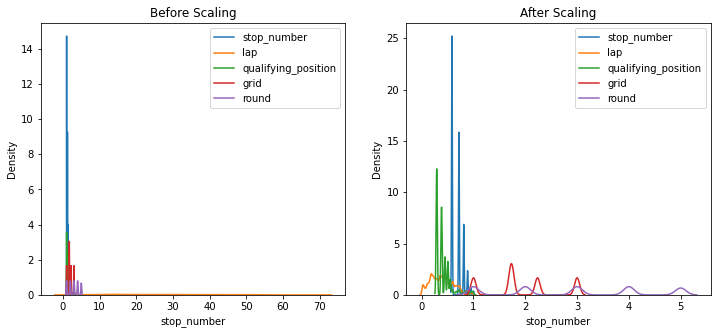

In [74]:
# Setting the subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['stop_number'], ax=ax1, label ='stop_number')
sns.kdeplot(X_train['lap'], ax=ax1, label ='lap')
sns.kdeplot(X_train['qualifying_position'], ax=ax1, label ='qualifying_position')
sns.kdeplot(X_train['grid'], ax=ax1, label ='grid')
sns.kdeplot(X_train['round'], ax=ax1, label ='round')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['stop_number'], ax=ax2, label ='stop_number')
sns.kdeplot(X_train_scaled['lap'], ax=ax2, label ='lap')
sns.kdeplot(X_train_scaled['qualifying_position'], ax=ax2, label ='qualifying_position')
sns.kdeplot(X_train['grid'], ax=ax2, label ='grid')
sns.kdeplot(X_train['round'], ax=ax2, label ='round')
ax2.legend()
plt.show()

## 7.0 Machine Learning Modelling
[Back to top](#top)

In [75]:
X_train_scaled

,stop_number,lap,duration_of_stop,qualifyId,constructorId,qualifying_position,resultId,raceId,grid,statusId,round,circuitId,race_name,race_year,race_month,race_quarter
0,0.719223,0.542857,0.011870,0.930217,1.000000,0.290423,0.633333,0.909091,0.577350,1.000000,0.6,0.6,0.00,1.0,0.8,1.0
1,0.812252,0.642857,0.010824,0.832150,1.000000,0.290423,0.633333,0.909091,0.577350,1.000000,0.6,0.6,0.00,1.0,0.8,1.0
2,0.719223,0.614286,0.011760,0.860544,1.000000,0.290423,0.766667,0.954545,0.745356,0.090909,0.8,0.8,0.25,1.0,0.8,1.0
3,0.584191,0.385714,0.010608,0.705908,1.000000,0.290423,1.000000,1.000000,0.577350,0.090909,1.0,1.0,0.50,1.0,1.0,1.0
4,0.946772,0.771429,0.010559,0.633068,1.000000,0.505656,0.633333,0.909091,0.577350,1.000000,0.6,0.6,0.00,1.0,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,0.584191,0.357143,0.011537,0.727749,1.000000,0.383215,0.300000,0.863636,1.000000,0.090909,0.4,0.4,0.75,1.0,0.6,0.5
449996,0.584191,0.200000,0.009105,0.550289,0.007634,0.383215,0.300000,0.863636,1.000000,0.090909,0.4,0.4,0.75,1.0,0.6,0.5
449997,0.812252,0.542857,0.009850,0.719122,1.000000,0.383215,0.011111,0.818182,0.333333,0.090909,0.2,0.2,1.00,1.0,0.6,0.5
449998,0.812252,0.428571,0.010520,0.555750,0.007634,0.505656,0.011111,0.818182,0.333333,0.090909,0.2,0.2,1.00,1.0,0.6,0.5


In [76]:
X_train.dtypes #All should be int/float

stop_number            float64
lap                      int64
duration_of_stop       float64
qualifyId                int64
constructorId            int64
qualifying_position    float64
resultId                 int64
raceId                   int64
grid                   float64
statusId                 int64
round                    int64
circuitId                int64
race_name                int64
race_year              float64
race_month             float64
race_quarter           float64
dtype: object

In [77]:
#Ensuring we get the final X and Y train/test values
X_train_final = X_train_scaled
X_test_final = X_test_scaled

y_train_final = y_train
y_test_final = y_test

### 7.1 Number of Rows and Columns 

In [78]:
X_train_final.shape

(450000, 16)

In [79]:
X_test_final.shape

(150001, 16)

In [80]:
y_train_final.shape

(450000, 1)

In [81]:
y_test_final.shape

(150001, 1)

### 7.2 Naive Baseline Model

This is a regression model as it is used when the output variable is a real or continuous value like "age", "salary", etc

In [82]:
y_train.mean()

position    4.898484
dtype: float64

In [83]:
print(y_train_final.mean())

mean_target_value = y_train.mean()


position    4.898484
dtype: float64


In [84]:
#y_train naive baseline
y_train_preds_naive = [round(mean_target_value,2) for row in X_train_final.iloc[:,0]]
y_train_preds_naive[0:5]

[position    4.9
 dtype: float64,
 position    4.9
 dtype: float64,
 position    4.9
 dtype: float64,
 position    4.9
 dtype: float64,
 position    4.9
 dtype: float64]

In [85]:
#y_test naive baseline
y_test_preds_naive = [round(mean_target_value,2) for row in X_test_final.iloc[:,0]]
y_test_preds_naive[0:5]

[position    4.9
 dtype: float64,
 position    4.9
 dtype: float64,
 position    4.9
 dtype: float64,
 position    4.9
 dtype: float64,
 position    4.9
 dtype: float64]

In [86]:
# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train_final
y_pred = y_train_preds_naive

train_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on train data is {train_mse_naive:.2f}.")

# test MSE score
y_true = y_test_final
y_pred = y_test_preds_naive

test_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on test data is {test_mse_naive:.2f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train_final
y_pred = y_train_preds_naive

train_rmse_naive = mean_squared_error(y_true, y_pred, squared=False) #False so it is RMSE, if true is MSE
print(f"The Naive Baseline Model's RMSE on train data is {train_rmse_naive:.2f}.")

# test RMSE score
y_true = y_test_final
y_pred = y_test_preds_naive

test_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on test data is {test_rmse_naive:.2f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train_final
y_pred = y_train_preds_naive

train_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on train data is {train_r2_naive:.2f}.")

# test R2 score
y_true = y_test_final
y_pred = y_test_preds_naive

test_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on test data is {test_r2_naive:.2f}.")


The Naive Baseline Model's MSE on train data is 18.93.
The Naive Baseline Model's MSE on test data is 18.90.

The Naive Baseline Model's RMSE on train data is 4.35.
The Naive Baseline Model's RMSE on test data is 4.35.

The Naive Baseline Model's R2 on train data is -0.00.
The Naive Baseline Model's R2 on test data is -0.00.


### 7.3 Linear Regression Modelling

In [87]:
linreg = LinearRegression().fit(X_train_final, y_train_final)

In [88]:
y_train_preds_linreg = linreg.predict(X_train_final)
y_test_preds_linreg = linreg.predict(X_test_final)

In [89]:
# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train_final
y_pred = y_train_preds_linreg

train_mse_linreg = mean_squared_error(y_true, y_pred)
print(f"The LinReg Model's MSE on train data is {train_mse_linreg:.4f}.")

# test MSE score
y_true = y_test_final
y_pred = y_test_preds_linreg

test_mse_linreg = mean_squared_error(y_true, y_pred)
print(f"The LinReg Model's MSE on test data is {test_mse_linreg:.4f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train_final
y_pred = y_train_preds_linreg

train_rmse_linreg = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LinReg Model's RMSE on train data is {train_rmse_linreg:.4f}.")

# test RMSE score
y_true = y_test_final
y_pred = y_test_preds_linreg

test_rmse_linreg = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LinReg Model's RMSE on test data is {test_rmse_linreg:.4f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train_final
y_pred = y_train_preds_linreg

train_r2_linreg = r2_score(y_true, y_pred)
print(f"The LinReg Model's R2 on train data is {train_r2_linreg:.4f}.")

# test R2 score
y_true = y_test_final
y_pred = y_test_preds_linreg

test_r2_linreg = r2_score(y_true, y_pred)
print(f"The LinReg Model's R2 on test data is {test_r2_linreg:.4f}.")


The LinReg Model's MSE on train data is 0.0000.
The LinReg Model's MSE on test data is 0.0000.

The LinReg Model's RMSE on train data is 0.0000.
The LinReg Model's RMSE on test data is 0.0000.

The LinReg Model's R2 on train data is 1.0000.
The LinReg Model's R2 on test data is 1.0000.


### 7.4 Feature Importance

In [90]:
# get importance
linreg_importance = linreg.coef_
linreg_importance

array([[-3.69124637e-14,  6.04422513e-15,  1.25010363e-14,
         2.74435115e-15,  5.78713825e-16, -9.53538646e-15,
        -2.22383091e+01, -1.04750564e+01,  6.77679415e+00,
         1.73311934e+01,  1.80512670e+01,  1.80512670e+01,
         3.35132082e+00,  0.00000000e+00, -1.12735953e+01,
         1.09038274e+00]])

In [91]:
# reorganize into dataframe
df_linreg_feature_importance = pd.DataFrame(X_train_final.columns, columns=["feature"])
df_linreg_feature_importance["importance"] = linreg_importance[0]
df_linreg_feature_importance

,feature,importance
0,stop_number,-3.691246e-14
1,lap,6.044225e-15
2,duration_of_stop,1.250104e-14
3,qualifyId,2.744351e-15
4,constructorId,5.787138e-16
5,qualifying_position,-9.535386e-15
6,resultId,-2.223831e+01
7,raceId,-1.047506e+01
8,grid,6.776794e+00
9,statusId,1.733119e+01


In [92]:
df_linreg_feature_importance.sort_values("importance", ascending=False)

,feature,importance
10,round,1.805127e+01
11,circuitId,1.805127e+01
9,statusId,1.733119e+01
8,grid,6.776794e+00
12,race_name,3.351321e+00
15,race_quarter,1.090383e+00
2,duration_of_stop,1.250104e-14
1,lap,6.044225e-15
3,qualifyId,2.744351e-15
4,constructorId,5.787138e-16


## Report  <a id="report"></a>
[Back to top](#top)

### Table of Contents  <a id="part1"></a>

#### 1. [Table of Contents](#part1) 

#### 2. [Introduction with Value Based Problem Statement](#part2)

#### 3. [Problem Formulation](#part3)
   - [3.1 Load the Data](#part3.1)
   - [3.2 Explore the Data](#part3.2)
   - [3.3 Understand the Data](#part3.3)
   - [3.4 Formulate a Prediction Problem](#part3.4)
   - [3.5 References](#part3.5)
   
#### 4. [Data Wrangling on Multiple Tables](#part4)
   - [4.1 Extract and Create Features from Different Tables](#part4.1)
   - [4.2 Concatenate, Merge or Join the Tables](#part4.2)
   - [4.3 Subsetting the Dataset](#part4.3)
   - [4.4 Grouping the Data](#part4.4)
   - [4.5 Concatenation](#part4.5)
   - [4.6 Joining (Left and Outer)](#part4.6)
   - [4.7 Sort by Value](#part4.7)
   
#### 5. [Data Cleansing and Transformation](#part5)
   - [5.1 Missing Value Imputation](#part5.1)
   - [5.2 Numerical Data (Outlier)](#part5.2)
   - [5.3 Train Test Split](#part5.3)
   - [5.4 Categorical Data Encoding](#part5.4)
   - [5.5 Numerical Data Transformation](#part5.5)
   - [5.6 Variable Discretization and Binning](#part5.6)
   
#### 6. [Machine Learning Model](#part6)
   - [6.1 Show Count of Rows and Columns](#part6.1)
   - [6.2 Build and Evaluate the Model Against a Naive Baseline Model](#part6.2)
   
#### 7. [Summary and Further Improvement](#part7)
   - [7.1 Summarise your Findings](#part7.1)
   - [7.2 Explain the Possible Further Improvements](#part7.2)

### 2.0 Introduction with Value Based Problem Statement <a id="part2"></a>
[Back to top](#top)

In data wrangling assignment 2, we are tasked with wrangling and preparing the given F1-Dataset to solve a prediction problem.


The value-based problem statement is for the company looking to market themselves to a global audience to expand their marketing potential into the potentially untapped market and countries which the aim is to increase overall sales through advertising themselves with a driver who would give them the most screen time to advertise.

This would be the driver who wins as they generally get the most positive screen time. Thus, with the driver's suit and car plastered with their sponsors all over, it would provide the company with immense marketing potential. Likewise, the fans of the driver would typically support the sponsors that these drivers are tied to.

Thus, with the prediction model, we can find out if the driver is doing well and is suitable for the company to garner positive advertisement which brings tons of value to the company.


<div style="text-align: right"> Word count for Section 2: 160</div>

### 3.0 Problem Formulation<a id="part3"></a>
[Back to top](#top)

#### 3.1 Load the Data <a id="part3.1"></a>

First and foremost, loading all the datasets into the Jupyter notebook is done through pandas read CSV file before creating a copy of each dataset as a backup in the event the datasets get corrupted as best practice. 

#### 3.2 Explore the Data <a id="part3.2"></a>

Data exploration found from the circuit data set was that circuits were scattered across the different countries and that the number of circuits per country varies largely. However, it is important to note that the regions that have multiple circuits for formula 1 are mainly the European and North American regions. Additionally, it was noted that the naming convention for the country was not consistent for the USA as there are instances whereby the country is called the USA and ‘United States’ which represent the same country but are named differently and would be picked up as different countries. Thus, this was something to take note of and should be standardised.

It was also found that in the pitstop dataset, the duration of pitstop remained fairly consistent despite the number of stops which entails that there isn’t much variation here. However, irregularities were found in the dataset where the vast majority of duration is in seconds. But there are several instances where the values were formatted in minutes, seconds, and milliseconds in the event when the pitstop duration exceeds one minute.
In the constructor’s dataset, it was found again that most constructor resides in Europe and mostly in Britain.

Likewise, in the driver dataset, most of the drivers are also from Europe and once again the British have the most drivers. It is also important to note that the driver's dataset has quite a large amount of null values which are denoted as ‘\N’ which would need to be cleaned as this format is not identified as a null by Jupyter Notebook.

Additionally, in the races dataset, we can observe the frequency of grand Prix and we once again can identify that Europe hosted the most Grand Prix with Britain once again leading with the most number of Grand Prix hosted.
Lastly, with the status id, we can identify the primary causes of DNF for drivers as a way to potentially mitigate the number of DNF a driver can experience over the next few races. We can observe that engine problems are potential issues that can be drilled further.


#### 3.3 Understand the Data <a id="part3.3"></a>

With the aid of these data sets, we can identify that from the beginning, Formula 1 has been a very Europe-dominated sport with drivers and constructors mainly coming from that region. This could be a potential area that formula 1 can diversify into to improve global presence and outreach.

#### 3.4 Formulate a Prediction Problem <a id="part3.4"></a>

The prediction problem is to find how the finishing position of the driver Lewis Hamilton over the years for several races the ‘Bahrain Grand Prix’, ‘Spanish Grand Prix’, ‘Turkish Grand Prix’, ‘Malaysian Grand Prix’, and the ‘Australian Grand Prix’. And find out which attribute affects his finishing position the most in these respective races.

The reason why Lewis Hamilton was chosen as the driver is that he is a 37-year-old British formula one driver who started his full-time Formula 1 career in 2007 and is still racing in F1 to this day.

He is also well recognised globally and is the most recognisable and influential F1 driver to have come about in recent times, having received an MBE from Queen Elizabeth II and having also officially received a knighthood from the Prince of Wales and is on the list of the 100 most influential people of 2020.

Thus, with the combination of the untapped potential of the country in which the races were held and the fact that Lewis Hamilton is one of the most influential people of our times, the people who are interested in this prediction model would be potential companies looking for marketing opportunities.


#### 3.5 References<a id="part3.5"></a>

Low, J. (2021). Lewis Hamilton is Now Sir Lewis Hamilton. Luxuo. https://www.luxuo.com/editors-picks/lewis-hamilton-is-now-sir-lewis-hamilton.html#:~:text=Hamilton%20received%20his%20MBE%20from,the%20knighthood%20while%20still%20racing.

F1. (2021). Seven-time F1 Champion Sir Lewis Hamilton Knighted at Windsor Castle. https://www.formula1.com/en/latest/article.seven-time-f1-champion-sir-lewis-hamilton-knighted-at-windsor-castle.5tY9cYG8dFe6nqLsYD1YQ4.html

Wallace, B. (2020). The 100 Most Influential People of 2020. Time.https://time.com/collection/100-most-influential-people-2020/5888433/lewis-hamilton/

<div style="text-align: right"> Word count for Section 3: 691</div>

### 4.0 Data Wrangling on Multiple Tables <a id="part4"></a>
[Back to top](#top)

#### 4.1 Extract and Create Features from Different Tables <a id="part4.1"></a>

Upon understanding the dataset and developing the prediction problem, I eventually decided to use the drivers mods, pit stops mod, qualifying mod, races mod, results mod and status mod datasets. 

Afterwards, where possible, the driver ID from the dataset is filtered to only obtain the driver id which is the driver id for Lewis Hamilton in this dataset. This was then followed by removing ‘URL’ from the datasets where it was present such as the drivers and races dataset as the URL serves as a reference for more information for the user through a link for more information but is not useful to be in the data model, thus, it was removed.

Moreover, in the qualifying dataset, ‘position’ was renamed to ‘qualifying position’ to aid in clarity as there were two columns who would be named position. One of which is finishing position and the other is qualifying position so thus, the qualifying position column name was changed.

Additionally, from the results dataset, several columns were dropped such as position text, position order, points, laps, times, milliseconds, fastest laps, rank, fastest lap time, and fastest lap speed as they were not very useful and also upon initial inspection, they cannot be used to predict finishing position as, under normal circumstances, we would not have these data when predicting the finishing position.


#### 4.2 Concatenate, Merge or Join the Tables<a id="part4.2"></a>

After the initial filtering of data and columns, we can merge the datasets into one large table through the inner join method. The pitstops, qualifying and results datasets were joined using the driver id and the races dataset was joined using race id as shown below.

We then drop the duplicates in the data frame to ensure that no repeated rows of data were created in the process of inner join as inner join has the tendency to create duplicate rows of data and values. As such, drop duplicates was done as a precaution to ensure no duplicates were generated.

After which, I renamed several columns as there are instances of columns with the same name but different meanings such as the automatically generated columns number x and cozde which was renamed to driver number and driver code respectively. Also, several columns are renamed to aid in understanding such as duration and name being renamed to duration of stop and race name respectively.

This is then followed by the dropping of unnecessary columns such as number y, number, race id x, race id y, and constructo rid y as they were repeated columns.

Columns where the data is constant throughout such as driver id, driver number, driver date of birth and other such columns were dropped as they were constant throughout and thus to improve model performance, this data was dropped. Afterall, these data remained constant due to the fact that the driver in this model remained consistent. 

Only after, can DateTime features be created where the time of race column was converted to pandas DateTime format and thereafter time was extracted and replaced the original time of race column.

As for the race date columns, irregularities were identified within the column where the year columns had an additional number which causes an error. As such, these instances were replaced where appropriate before converting the race date column to pandas DateTime as well.

With the race data in pandas DateTime format, we can extract the year, month, and quarter of the race. Naming them race year, race month, and race quarter respectively. This would help later in the model as the model is unable to run variables in the DateTime format. Thus, we extracted the relevant time variables to serve as a substitute.

Similarly, the duration of stop was originally formatted as an object which is a categorical variable but ideally, this should be a numerical variable. However, before converting the datatype, it was identified earlier that in instances where the duration of stop exceeds a minute, the format changed. As such, we would have to standardise those data to show the duration of stop in terms of seconds. After doing so, we can convert the data type to a float type. 


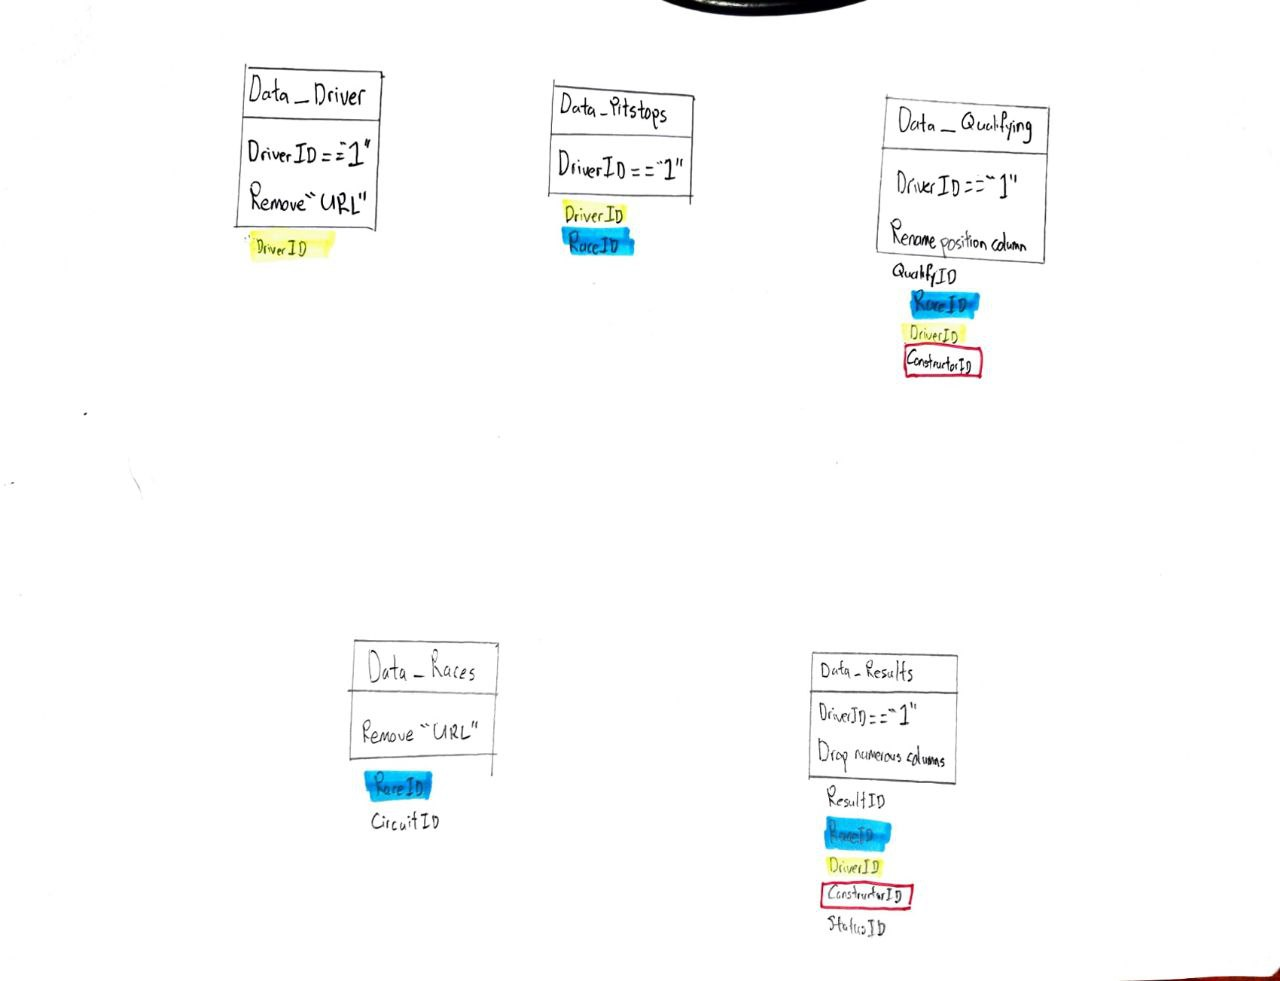

#### 4.3 Subsetting the Dataset <a id="part4.3"></a>

Lastly, an unorthodox step has to be done where I had to subset the dataset to get only the first 600,000 rows of data. This was done as the originally joined dataset has 35 million rows of data which had a performance issue due to the hardware limitation of my laptop. As such, 600,000 rows of data were chosen as it still allowed the model to be relatively accurate while allowing for optimal performance.

#### 4.3 Subsetting the Dataset <a id="part4.3"></a>

Lastly, an unorthodox step has to be done where I had to subset the dataset to get only the first 600,000 rows of data. This was done as the originally joined dataset has 35 million rows of data which had a performance issue due to the hardware limitation of my laptop. As such, 600,000 rows of data were chosen as it still allowed the model to be relatively accurate while allowing for optimal performance.

#### 4.4 Grouping the Dataset <a id="part4.4"></a>

Grouping was not done in this case as there wasn’t a need to group different variables together as filtering was already done at the earlier stage to get the driver in question that we want. Furthermore, we are looking for data pertaining to just one specific driver so in this case there isn’t a need to group multiple drivers or multiple variables together. Additionally, no aggregate functions were made thus grouping and group by was not necessary.

#### 4.5 Concatenation <a id="part4.5"></a>

Concatenation was also not done as the different datasets have very differing columns. As such they could not simply be stacked either vertically or horizontally. As such, concatenation will not be useful given the current circumstances.

#### 4.6 Joining (Left & Outer) <a id="part4.6"></a>

Left and outer join were not used and inner join was favoured as outer join and left join would result in many Na and NaN values due to the nature and the way at which they join. As such, so minimise complexity and the need to do extra avoidable steps down the road, inner join was greatly preferred.

#### 4.7 Sort by Value <a id="part4.7"></a>

Soft by value was also not needed as we simply needed to filter the driver id, one, which we wanted. Additionally, there is no variable within the dataset that requires to be sorted as such this function was not used in this assignment

<div style="text-align: right"> Word count for Section 5: 1003</div>

### 5.0 Data Cleansing and Transformation <a id="part5"></a>
[Back to top](#top)

#### 5.1 Missing Value Imputation <a id="part5.1"></a>

Previously while exploring the data, it was found that there were placeholder values such as ‘\\N’ that were used to represent null values. However, this variable used to represent null values was not able to be identified by the Jupyter notebook. As such, I replaced ‘\\N’ which were placeholder values to represent nan values. I had to replace it to garner a true understanding of the missing values in the dataset. 

Based on the current subset of data, there aren’t any missing values present. However, when another subset of the dataset is taken, there could be missing values. As such, if such events were to arise, pipeline imputation would be used to handle the missing values for the numerical and categorical variables. This can be accomplished by placing the respective columns into the respective names and thereafter fitting and transforming the dataset.

 I used pipeline imputation using the feature engine. I used a feature engine over scikit learning for example as scikit learning has not only more steps, but the end results would be in the form of an array which has to be converted back to a data frame format which seems like an extra hassle for no real benefit. The pipeline imputation aided me in the convenience of replacing numerical variables and categorical variables as it requires fewer steps than most of the other methods and it has that degree of automation by replacing numerical categories with either the mean of an arbitrary number and either frequent or missing for the categorical variable.
 
In the case whereby a column is a DateTime object with missing values, if there isn’t a large number of missing values, a complete case analysis can be used to simply remove the null values to mitigate and get rid of the null values.

After these imputation and DateTime calculations, race_date and time_of_race columns would then be dropped as they are DateTime data types which cannot be used for the next step in model prediction. 


#### 5.2 Numerical Data (Outlier) <a id="part5.2"></a>

As for the handling of outliers for the numerical data, we would use a histogram to explore the numerical variables of the data set before using diagnostics plots which consist of a histogram, Q-Q plot, and boxplot to show the outliers for the numerical variables.

It can be observed that although yes, there are outliers, it is shown to be true values regardless and we should not get rid of them as they are not completely untrue for instance age being 300. As such, for the most part, I chose to leave it alone given this subset of the dataset.

However, in the event that other subsets of the dataset may be needed to alter the outliers, the windsorizer can be used through the gaussian capping method which allows the user to choose for which variable should the method be applied to and specify which tail to add it to. This would help eliminate the outliers by capping them to one side of the fence, thus getting rid of the untrue outliers that may affect the accuracy of the model prediction down the road.


#### 5.3 Train Test Split <a id="part5.3"></a>

After this step, the train test split was done by taking the position column as the target and test size to be 25%. This resulted in the X series having 16 columns where X_train has 450,000 rows and X_test has 150,001 rows of data.

#### 5.4 Categorical Data Encoding <a id="part5.4"></a>

After the train test split, categorical data encoding can be done where we identified the different races in this subset of the data. We then used ordinal encoding where it replaces categories with digits from 1 to the number of distinct categories of the variable of which the numbers are automatically assigned arbitrarily of which the dictionary is shown. This is an unordered ordinal encoding as there isn’t a need to order it as such and thus it was not used. This was done to both X_train and X_test.

I used this method over one hot encoding as one hot encoding will result in a lot of columns which will get very hard and annoying to read given the number of variables I have. Also, one hot encoding of frequent categories wouldn’t work as this will automatically choose the variables and would often time not choose the variables I desired thus, this method was not used.

I didn’t replace the categories with counts, frequency, mean of the target, and grouping rare categories as well as I find it hard to read given the sheer number of variables and would lead to confusion as the numbers do not make logical sense and are often hard to reference as well. After all, we should instead be aiming for ease of viewing.


#### 5.5 Numerical Data Transformation <a id="part5.5"></a>

As for the numerical data transformation, We did numerical data encoding to try to normally distribute the input variables using transformation which can also help to find the linear relationship among variables and target.

I chose the power transformation method as it is dependent on lambda, and we can try different lambda to determine which one gives us the best transformation. Although I had to play around with the lambda values in order to get the distribution I desired, in the end, while testing the various methods, it gave me the best model score.

I did not use the logarithmic and reciprocal transformation method as it had a strong transformation which resulted in an extreme effect on the distribution of the variable.


#### 5.6 Variable Discretization and Binning <a id="part5.6"></a>

I also did equal width discretisation which is a method used for sorting the variable values into intervals of the same width. The number of intervals is decided arbitrarily and width is determined by the range of values of the variable as well as the number of bins to be created.

I did not use discretisation plus categorical encoding as the variables used for my code are not treated as categorical. Thus, there is no need to reorder the intervals according to the target value.

I also did not use the arbitrary interval discretisation as although I tried to, I could not get the interval value as per what I wanted and thus, I did not use this method.

Furthermore, while testing with all the different methods including the equal frequency discretisation, they did not give MSE and R-square values better than that while using equal width discretisation.

<div style="text-align: right"> Word count for Section 5: 1072</div>

### 6.0 Machine Learning Model <a id="part6"></a>
[Back to top](#top)

#### 6.1 Show Count of Rows and Columns <a id="part6.1"></a>

After the data cleansing and transformation, the shape of the train test split may change. As a result, using the .shape function, we can find out the size of our dataset that would be used for the modelling. This is important as it is paramount that the size of the dataset isn’t too small to ensure that the model has a higher level of accuracy. As such, we can see that X_train and y_train both have 450,000 rows of data with 16 and 1 column respectively. Likewise, X_test and y_test have 150,001 rows of data with 16 and 1 column respectively. 

Thus, given the size of the dataset, I am confident that it is sufficient for this assignment to create an accurate model.


#### 6.2 Build and Evaluate the Model Against a Naive Baseline Model <a id="part6.2"></a>

When building a naïve baseline model, the regression model was used as the output variable is the position which is real. As such, it was found that the mean value of y_train is 4.9. This unsurprisingly resulted in a naive baseline model that is not very accurate whose mean square error for train and test data is 18.93 and 18.9 respectively. Additionally, the root mean square error is 4.35 for both train and test data and the r2 is 0 as well.  
Ideally, a good mean square error is a value that is lower with zero being a perfect model. Likewise, for root mean square error, the lower the better. For the r2 value, the higher the value, the more useful it is with the value one denoting a perfect fit.

With this in mind, I created a linear regression model for my data modelling and this would be compared against the naive baseline model to ensure that it is minimally better than that of the naive baseline. This was done by importing the linear regression function from sklearn linear model which easily allows us to create a linear regression model while producing the MSE, RMSE, and r2 values which can be used to evaluate the model. Doing so, resulted in a MSE and RMSE value of 0 for both train and test data with the r2 value being one. 

This is compared to the naïve baseline model means that the current linear regression model is more accurate and is a better fit. If viewing based on the score for the linear regression model, it is a really accurate model with a perfect fit which is really surprising. This means that the model should be able to predict the target position very well and accurately given the variables we have.

Additionally, linear regression feature importance was also used to find out for each variable, how important is it when finding the target value. After getting the importance which resulted in an array, we reorganise the feature importance into a data frame which is then sorted in descending order. 
As such, the variable with the greatest importance when it came to predicting the target value, position, is round with race month holding one of the least importance.
 
<div style="text-align: right"> Word count for Section 6: 517</div>

### 7.0 Summary and Further Improvements  <a id="part7"></a>
[Back to top](#top)

#### 7.1 Summarise your Findings <a id="part7.1"></a>

It is found that for the company looking to advertise with Lewis Hamilton, it is a safe bet that Lewis Hamilton would be winning if not at the front of the grid in terms of their finishing position and given the circumstances, Lewis Hamilton would be likely to win. As such, for the company, it is a good idea for the company to sponsor Lewis Hamilton in an effort to expand its sales and marketing across the globe.

This would be a safe bet given the accuracy of the current model and should anything happen, it is important to see that the round and the grid is amongst the most important variable in determining his finishing position. Thus, this could be focused upon by the company.


#### 7.2 Explain the Possible Further Improvements <a id="part7.2"></a>

The current linear regression is accurate with the current size of the dataset. However, it is always best practice to run a model with as many rows of data as possible to ensure accuracy as right now, the model can be accurate. But upon using the full 35 million rows of data, the results could be very different.

Likewise, more columns of data and variables can help improve model accuracy especially since currently, we are missing key technical data in the model prediction which can play a huge role in determining the finishing place of the driver.

<div style="text-align: right"> Word count for Section 7: 233</div>

### Other Methods (Not used) <a id="methods"></a>
[Back to top](#top)

The following code is other methods that were tried out but not used due to it having poorer MSE, RMSE, and r2 score in the model

- [Outlier](#O1)
- [Missing Value Imputation](#O2)
- [Categorical Data Encoding](#O3)
- [Variable Discretization/Binniing](#O4)
- [Feature Engineering](#O5)

### Outlier <a id="O1"></a>
[Back to top](#top)

In [93]:
"""
def find_boundaries(df, variable):
    lower_boundary = df[variable].quantile(0.05)
    upper_boundary = df[variable].quantile(0.95)
    return upper_boundary, lower_boundary

#Limits for Item_Visibility
IV_upper_limit, IV_lower_limit = find_boundaries(data, 'Item_Visibility')
IV_upper_limit, IV_lower_limit

#limits for Item_Outlet_Sales
IOS_upper_limit, IOS_lower_limit = find_boundaries(data, 'Item_Outlet_Sales')
IOS_upper_limit, IOS_lower_limit

#Flagging the outliers in Item_Visibility
outliers_IV = np.where(data['Item_Visibility'] > IV_upper_limit, True,
                       np.where(data['Item_Visibility'] < IV_lower_limit, True, False))

#Flagging the outliers in Item_Outlet_Sales
outliers_IOS = np.where(data['Item_Outlet_Sales'] > IOS_upper_limit, True,
                       np.where(data['Item_Outlet_Sales'] < IOS_lower_limit, True, False))

#Trimming the dataset by removing outliers for Item_Visibility
data_trimmed1 = data.loc[~outliers_IV ]

#Trimming the dataset by removing outliers for Item_Visibility
data_trimmed2 = data.loc[~outliers_IOS ]

data.shape, data_trimmed1.shape, data_trimmed2.shape
"""

"\ndef find_boundaries(df, variable):\n    lower_boundary = df[variable].quantile(0.05)\n    upper_boundary = df[variable].quantile(0.95)\n    return upper_boundary, lower_boundary\n\n#Limits for Item_Visibility\nIV_upper_limit, IV_lower_limit = find_boundaries(data, 'Item_Visibility')\nIV_upper_limit, IV_lower_limit\n\n#limits for Item_Outlet_Sales\nIOS_upper_limit, IOS_lower_limit = find_boundaries(data, 'Item_Outlet_Sales')\nIOS_upper_limit, IOS_lower_limit\n\n#Flagging the outliers in Item_Visibility\noutliers_IV = np.where(data['Item_Visibility'] > IV_upper_limit, True,\n                       np.where(data['Item_Visibility'] < IV_lower_limit, True, False))\n\n#Flagging the outliers in Item_Outlet_Sales\noutliers_IOS = np.where(data['Item_Outlet_Sales'] > IOS_upper_limit, True,\n                       np.where(data['Item_Outlet_Sales'] < IOS_lower_limit, True, False))\n\n#Trimming the dataset by removing outliers for Item_Visibility\ndata_trimmed1 = data.loc[~outliers_IV ]\n\n#Tri

In [94]:
"""
1.5x IQR boundaries

def find_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

#Limits for Item_Visibility
IV_upper_limit, IV_lower_limit = find_boundaries(data, 'Item_Visibility', 1.5)
IV_upper_limit, IV_lower_limit

#limits for Item_Outlet_Sales
IOS_upper_limit, IOS_lower_limit = find_boundaries(data, 'Item_Outlet_Sales', 1.5)
IOS_upper_limit, IOS_lower_limit

#Flagging the outliers in Item_Visibility
outliers_IV = np.where(data['Item_Visibility'] > IV_upper_limit, True,
                       np.where(data['Item_Visibility'] < IV_lower_limit, True, False))

#Flagging the outliers in Item_Outlet_Sales
outliers_IOS = np.where(data['Item_Outlet_Sales'] > IOS_upper_limit, True,
                       np.where(data['Item_Outlet_Sales'] < IOS_lower_limit, True, False))

#Trimming the dataset by removing outliers for Item_Visibility
data_trimmed1 = data.loc[~outliers_IV ]

#Trimming the dataset by removing outliers for Item_Visibility
data_trimmed2 = data.loc[~outliers_IOS ]

data.shape, data_trimmed1.shape, data_trimmed2.shape
"""

"\n1.5x IQR boundaries\n\ndef find_boundaries(df, variable, distance):\n\n    # Let's calculate the boundaries outside which sit the outliers\n    # for skewed distributions\n\n    # distance passed as an argument, gives us the option to\n    # estimate 1.5 times or 3 times the IQR to calculate\n    # the boundaries.\n\n    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)\n\n    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)\n    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)\n\n    return upper_boundary, lower_boundary\n\n#Limits for Item_Visibility\nIV_upper_limit, IV_lower_limit = find_boundaries(data, 'Item_Visibility', 1.5)\nIV_upper_limit, IV_lower_limit\n\n#limits for Item_Outlet_Sales\nIOS_upper_limit, IOS_lower_limit = find_boundaries(data, 'Item_Outlet_Sales', 1.5)\nIOS_upper_limit, IOS_lower_limit\n\n#Flagging the outliers in Item_Visibility\noutliers_IV = np.where(data['Item_Visibility'] > IV_upper_limit, True,\n             

In [95]:
"""
3 SD from mean

def find_boundaries(df, variable, distance):
    lower_boundary = df[variable].mean() - (df[variable].std() * distance)
    upper_boundary = df[variable].mean() + (df[variable].std() * distance)
    return upper_boundary, lower_boundary

#Limits for Item_Visibility
IV_upper_limit, IV_lower_limit = find_boundaries(data, 'Item_Visibility', 3)
IV_upper_limit, IV_lower_limit

#limits for Item_Outlet_Sales
IOS_upper_limit, IOS_lower_limit = find_boundaries(data, 'Item_Outlet_Sales', 3)
IOS_upper_limit, IOS_lower_limit

#Flagging the outliers in Item_Visibility
outliers_IV = np.where(data['Item_Visibility'] > IV_upper_limit, True,
                       np.where(data['Item_Visibility'] < IV_lower_limit, True, False))

#Flagging the outliers in Item_Outlet_Sales
outliers_IOS = np.where(data['Item_Outlet_Sales'] > IOS_upper_limit, True,
                       np.where(data['Item_Outlet_Sales'] < IOS_lower_limit, True, False))

#Trimming the dataset by removing outliers for Item_Visibility
data_trimmed1 = data.loc[~outliers_IV ]

#Trimming the dataset by removing outliers for Item_Visibility
data_trimmed2 = data.loc[~outliers_IOS ]

data.shape, data_trimmed1.shape, data_trimmed2.shape
"""

"\n3 SD from mean\n\ndef find_boundaries(df, variable, distance):\n    lower_boundary = df[variable].mean() - (df[variable].std() * distance)\n    upper_boundary = df[variable].mean() + (df[variable].std() * distance)\n    return upper_boundary, lower_boundary\n\n#Limits for Item_Visibility\nIV_upper_limit, IV_lower_limit = find_boundaries(data, 'Item_Visibility', 3)\nIV_upper_limit, IV_lower_limit\n\n#limits for Item_Outlet_Sales\nIOS_upper_limit, IOS_lower_limit = find_boundaries(data, 'Item_Outlet_Sales', 3)\nIOS_upper_limit, IOS_lower_limit\n\n#Flagging the outliers in Item_Visibility\noutliers_IV = np.where(data['Item_Visibility'] > IV_upper_limit, True,\n                       np.where(data['Item_Visibility'] < IV_lower_limit, True, False))\n\n#Flagging the outliers in Item_Outlet_Sales\noutliers_IOS = np.where(data['Item_Outlet_Sales'] > IOS_upper_limit, True,\n                       np.where(data['Item_Outlet_Sales'] < IOS_lower_limit, True, False))\n\n#Trimming the dataset by 

#### Zero-coding

In [96]:
"""
from feature_engine.outliers import ArbitraryOutlierCapper

# create the capper

windsoriser = ArbitraryOutlierCapper(max_capping_dict={'Item_Visibility':0.15, 'Item_Outlet_Sales':6000},
                                     min_capping_dict= None)

windsoriser.fit(data)
data_t = windsoriser.transform(data)
"""

"\nfrom feature_engine.outliers import ArbitraryOutlierCapper\n\n# create the capper\n\nwindsoriser = ArbitraryOutlierCapper(max_capping_dict={'Item_Visibility':0.15, 'Item_Outlet_Sales':6000},\n                                     min_capping_dict= None)\n\nwindsoriser.fit(data)\ndata_t = windsoriser.transform(data)\n"

### Missing Value Imputation <a id="O2"></a>
[Back to top](#top)

In [97]:
"""
#Median Imputation
#(Median imputation)
for var in ['race_year']:

    value = X_train[var].median()
    print(value)

    X_train[var] = X_train[var].fillna(value)
    X_test[var] = X_test[var].fillna(value)
"""

"\n#Median Imputation\n#(Median imputation)\nfor var in ['race_year']:\n\n    value = X_train[var].median()\n    print(value)\n\n    X_train[var] = X_train[var].fillna(value)\n    X_test[var] = X_test[var].fillna(value)\n"

In [98]:
"""
#(Mean imputation)
for var in ['race_month']:

    value = X_train[var].mean()
    print(value)

    X_train[var] = X_train[var].fillna(value)
    X_test[var] = X_test[var].fillna(value)
"""

"\n#(Mean imputation)\nfor var in ['race_month']:\n\n    value = X_train[var].mean()\n    print(value)\n\n    X_train[var] = X_train[var].fillna(value)\n    X_test[var] = X_test[var].fillna(value)\n"

In [99]:
"""
#Mode or frequent category imputation

#For Outlet_Size (Categorical variable, Mode imputation) (Using Pandas)
for var in ['position']:
    
    value = X_train[var].mode()[0] #12.15

    X_train[var] = X_train[var].fillna(value)
    X_test[var] = X_test[var].fillna(value)
    
X_train.isnull().mean().sort_values()
"""

"\n#Mode or frequent category imputation\n\n#For Outlet_Size (Categorical variable, Mode imputation) (Using Pandas)\nfor var in ['position']:\n    \n    value = X_train[var].mode()[0] #12.15\n\n    X_train[var] = X_train[var].fillna(value)\n    X_test[var] = X_test[var].fillna(value)\n    \nX_train.isnull().mean().sort_values()\n"

In [100]:
"""
#Replacing missing values by an arbitary number (Numerical)

# to impute missing data with feature-engine
from feature_engine.imputation import ArbitraryNumberImputer

imputer = ArbitraryNumberImputer(
    arbitrary_number=19, variables=['race_quarter'])

imputer.fit(X_train)
imputer.arbitrary_number

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train[['Item_Weight']].isnull().mean()
"""

"\n#Replacing missing values by an arbitary number (Numerical)\n\n# to impute missing data with feature-engine\nfrom feature_engine.imputation import ArbitraryNumberImputer\n\nimputer = ArbitraryNumberImputer(\n    arbitrary_number=19, variables=['race_quarter'])\n\nimputer.fit(X_train)\nimputer.arbitrary_number\n\nX_train = imputer.transform(X_train)\nX_test = imputer.transform(X_test)\n\nX_train[['Item_Weight']].isnull().mean()\n"

In [101]:
"""
#Capturing missing values in a bespoke category (Categorical)

from feature_engine.imputation import CategoricalImputer
imputer = CategoricalImputer(variables=['position'])

imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train[['Outlet_Size']].isnull().mean()
"""

"\n#Capturing missing values in a bespoke category (Categorical)\n\nfrom feature_engine.imputation import CategoricalImputer\nimputer = CategoricalImputer(variables=['position'])\n\nimputer.fit(X_train)\nX_train = imputer.transform(X_train)\nX_test = imputer.transform(X_test)\n\nX_train[['Outlet_Size']].isnull().mean()\n"

In [102]:
"""
#Replacing missing value by end of distribution value (Numerical)

from feature_engine.imputation import EndTailImputer
imputer = EndTailImputer(imputation_method='iqr', tail='right', fold =1.5, 
                         variables=['race_year'])

imputer.fit(X_train)
imputer.imputer_dict_ 

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train[['Item_Weight']].isnull().mean()
"""

"\n#Replacing missing value by end of distribution value (Numerical)\n\nfrom feature_engine.imputation import EndTailImputer\nimputer = EndTailImputer(imputation_method='iqr', tail='right', fold =1.5, \n                         variables=['race_year'])\n\nimputer.fit(X_train)\nimputer.imputer_dict_ \n\nX_train = imputer.transform(X_train)\nX_test = imputer.transform(X_test)\n\nX_train[['Item_Weight']].isnull().mean()\n"

In [103]:
"""
#Implementing random sample imputation (Categorical & Numerical)

from feature_engine.imputation import RandomSampleImputer

imputer = RandomSampleImputer()

imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)
X_train.isnull().mean()
"""

'\n#Implementing random sample imputation (Categorical & Numerical)\n\nfrom feature_engine.imputation import RandomSampleImputer\n\nimputer = RandomSampleImputer()\n\nimputer.fit(X_train)\nX_train = imputer.transform(X_train)\nX_test = imputer.transform(X_test)\nX_train.isnull().mean()\n'

In [104]:
"""
#Adding a missing value indicator variable

from feature_engine.imputation import AddMissingIndicator

imputer = AddMissingIndicator()

imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train.head()
"""

'\n#Adding a missing value indicator variable\n\nfrom feature_engine.imputation import AddMissingIndicator\n\nimputer = AddMissingIndicator()\n\nimputer.fit(X_train)\n\nX_train = imputer.transform(X_train)\nX_test = imputer.transform(X_test)\n\nX_train.head()\n'

### Categorical Data Encoding <a id="O3"></a>
[Back to top](#top)

In [105]:
"""
#One Hot Encoding

from feature_engine.encoding import OneHotEncoder

ohe_enc = OneHotEncoder(
    top_categories=None,
    drop_last=True)  # to return k-1, false to return k

ohe_enc.fit(X_train)
X_train_enc = ohe_enc.transform(X_train)
X_test_enc = ohe_enc.transform(X_test)

X_train_enc.head()
"""

'\n#One Hot Encoding\n\nfrom feature_engine.encoding import OneHotEncoder\n\nohe_enc = OneHotEncoder(\n    top_categories=None,\n    drop_last=True)  # to return k-1, false to return k\n\nohe_enc.fit(X_train)\nX_train_enc = ohe_enc.transform(X_train)\nX_test_enc = ohe_enc.transform(X_test)\n\nX_train_enc.head()\n'

In [106]:
"""
#One Hot Encoding Top Categories

from feature_engine.encoding import OneHotEncoder

ohe_enc = OneHotEncoder(
    
    # to indicate how many top categories
    top_categories=2,  
    
    # we can select which variables to encode
    variables=['race_name'],
    
    # to indicate if we drop one of the binaries
    drop_last=False)

ohe_enc.fit(X_train)
X_train_enc = ohe_enc.transform(X_train)
X_test_enc = ohe_enc.transform(X_test)
X_train_enc.head()
"""

"\n#One Hot Encoding Top Categories\n\nfrom feature_engine.encoding import OneHotEncoder\n\nohe_enc = OneHotEncoder(\n    \n    # to indicate how many top categories\n    top_categories=2,  \n    \n    # we can select which variables to encode\n    variables=['race_name'],\n    \n    # to indicate if we drop one of the binaries\n    drop_last=False)\n\nohe_enc.fit(X_train)\nX_train_enc = ohe_enc.transform(X_train)\nX_test_enc = ohe_enc.transform(X_test)\nX_train_enc.head()\n"

In [107]:
"""
#Replacing categories by counts 

from feature_engine.encoding import CountFrequencyEncoder

vars_categorical = ['race_name']

count_enc = CountFrequencyEncoder(
    encoding_method='count', # to do frequency ==> encoding_method='frequency'
    variables=vars_categorical)

count_enc.fit(X_train)
X_train_enc = count_enc.transform(X_train)
X_test_enc = count_enc.transform(X_test)
X_train_enc.head()
count_enc.encoder_dict_
"""

"\n#Replacing categories by counts \n\nfrom feature_engine.encoding import CountFrequencyEncoder\n\nvars_categorical = ['race_name']\n\ncount_enc = CountFrequencyEncoder(\n    encoding_method='count', # to do frequency ==> encoding_method='frequency'\n    variables=vars_categorical)\n\ncount_enc.fit(X_train)\nX_train_enc = count_enc.transform(X_train)\nX_test_enc = count_enc.transform(X_test)\nX_train_enc.head()\ncount_enc.encoder_dict_\n"

In [108]:
"""
#Replacing categories by frequency 

from feature_engine.encoding import CountFrequencyEncoder

vars_categorical = ['race_name']

count_enc = CountFrequencyEncoder(
    encoding_method='frequency', # to do frequency ==> encoding_method='frequency'
    variables=vars_categorical)

count_enc.fit(X_train)
X_train_enc = count_enc.transform(X_train)
X_test_enc = count_enc.transform(X_test)
X_train_enc.head()
count_enc.encoder_dict_
"""

"\n#Replacing categories by frequency \n\nfrom feature_engine.encoding import CountFrequencyEncoder\n\nvars_categorical = ['race_name']\n\ncount_enc = CountFrequencyEncoder(\n    encoding_method='frequency', # to do frequency ==> encoding_method='frequency'\n    variables=vars_categorical)\n\ncount_enc.fit(X_train)\nX_train_enc = count_enc.transform(X_train)\nX_test_enc = count_enc.transform(X_test)\nX_train_enc.head()\ncount_enc.encoder_dict_\n"

In [109]:
"""
#Ordered ordinal encoding (Ordered, not unordered)

from feature_engine.encoding import OrdinalEncoder

ordinal_enc = OrdinalEncoder(
    encoding_method='ordered')

ordinal_enc.fit(X_train, y_train)
X_train_enc = ordinal_enc.transform(X_train)
X_test_enc = ordinal_enc.transform(X_test)
X_train_enc.head()


#ordinal_enc.fit(X_train, y_train)
ordinal_enc.encoder_dict_
"""

"\n#Ordered ordinal encoding (Ordered, not unordered)\n\nfrom feature_engine.encoding import OrdinalEncoder\n\nordinal_enc = OrdinalEncoder(\n    encoding_method='ordered')\n\nordinal_enc.fit(X_train, y_train)\nX_train_enc = ordinal_enc.transform(X_train)\nX_test_enc = ordinal_enc.transform(X_test)\nX_train_enc.head()\n\n\n#ordinal_enc.fit(X_train, y_train)\nordinal_enc.encoder_dict_\n"

In [110]:
"""
#Target mean encoding

from feature_engine.encoding import MeanEncoder

vars_categorical = ['race_name']

mean_enc = MeanEncoder(variables=vars_categorical)
mean_enc.fit(X_train, y_train)

X_train_enc = mean_enc.transform(X_train)
X_test_enc = mean_enc.transform(X_test)

X_train_enc.head()
mean_enc.encoder_dict_
"""

"\n#Target mean encoding\n\nfrom feature_engine.encoding import MeanEncoder\n\nvars_categorical = ['race_name']\n\nmean_enc = MeanEncoder(variables=vars_categorical)\nmean_enc.fit(X_train, y_train)\n\nX_train_enc = mean_enc.transform(X_train)\nX_test_enc = mean_enc.transform(X_test)\n\nX_train_enc.head()\nmean_enc.encoder_dict_\n"

In [111]:
"""
#Grouping rare categories

from feature_engine.encoding import RareLabelEncoder

rare_encoder = RareLabelEncoder(tol=0.05, n_categories=4)  

rare_encoder.fit(X_train)
X_train_enc = rare_encoder.transform(X_train)
X_test_enc = rare_encoder.transform(X_test)
X_train_enc.head()

rare_encoder.encoder_dict_
"""

'\n#Grouping rare categories\n\nfrom feature_engine.encoding import RareLabelEncoder\n\nrare_encoder = RareLabelEncoder(tol=0.05, n_categories=4)  \n\nrare_encoder.fit(X_train)\nX_train_enc = rare_encoder.transform(X_train)\nX_test_enc = rare_encoder.transform(X_test)\nX_train_enc.head()\n\nrare_encoder.encoder_dict_\n'

### Variable Discretization/Binniing <a id="O4"></a>
[Back to top](#top)

In [112]:
"""
#Equal Frequency Distribution
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualFrequencyDiscretiser

disc = EqualFrequencyDiscretiser(q=10, variables = ['race_year', 'race_month', 'race_quarter'])

disc.fit(X_train)
train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

"""

"\n#Equal Frequency Distribution\nfrom sklearn.preprocessing import KBinsDiscretizer\nfrom feature_engine.discretisation import EqualFrequencyDiscretiser\n\ndisc = EqualFrequencyDiscretiser(q=10, variables = ['race_year', 'race_month', 'race_quarter'])\n\ndisc.fit(X_train)\ntrain_t = disc.transform(X_train)\ntest_t = disc.transform(X_test)\n\n"

### Feature Engineering <a id="O5"></a>
[Back to top](#top)

In [113]:
"""
#Standardisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[num_cols])


X_train_scaled = scaler.transform(X_train[num_cols])
X_test_scaled = scaler.transform(X_test[num_cols])

scaler.mean_ #Mean
scaler.scale_ #SD

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train[num_cols].columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test[num_cols].columns)
"""

'\n#Standardisation\nfrom sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\nscaler.fit(X_train[num_cols])\n\n\nX_train_scaled = scaler.transform(X_train[num_cols])\nX_test_scaled = scaler.transform(X_test[num_cols])\n\nscaler.mean_ #Mean\nscaler.scale_ #SD\n\nX_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train[num_cols].columns)\nX_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test[num_cols].columns)\n'

In [114]:
"""
#Mean Normalisation
from sklearn.preprocessing import StandardScaler, RobustScaler

means = X_train.mean(axis=0)
ranges = X_train[num_cols].max(axis=0)-X_train[num_cols2].min(axis=0)

X_train_scaled = (X_train[num_cols] - means) / ranges
X_test_scaled = (X_test[num_cols] - means) / ranges

X_train_scaled
"""

'\n#Mean Normalisation\nfrom sklearn.preprocessing import StandardScaler, RobustScaler\n\nmeans = X_train.mean(axis=0)\nranges = X_train[num_cols].max(axis=0)-X_train[num_cols2].min(axis=0)\n\nX_train_scaled = (X_train[num_cols] - means) / ranges\nX_test_scaled = (X_test[num_cols] - means) / ranges\n\nX_train_scaled\n'

In [115]:
"""
#Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train[num_cols])

X_train_scaled = scaler.transform(X_train[num_cols])
X_test_scaled = scaler.transform(X_test[num_cols])

#To show Max, Min & Range 
scaler.data_max_
scaler.min_
scaler.data_range_
"""

'\n#Min-Max Scaling\nfrom sklearn.preprocessing import MinMaxScaler\n\nscaler = MinMaxScaler()\n\nscaler.fit(X_train[num_cols])\n\nX_train_scaled = scaler.transform(X_train[num_cols])\nX_test_scaled = scaler.transform(X_test[num_cols])\n\n#To show Max, Min & Range \nscaler.data_max_\nscaler.min_\nscaler.data_range_\n'

In [116]:
"""
#Robust Scaling
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train[num_cols])

# transform train and test sets
X_train_scaled = scaler.transform(X_train[num_cols])
X_test_scaled = scaler.transform(X_train[num_cols])

scaler.center_
scaler.scale_

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train[num_cols].columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test[num_cols].columns)
"""

'\n#Robust Scaling\nfrom sklearn.preprocessing import RobustScaler\n\nscaler = RobustScaler()\n\n# fit the scaler to the train set, it will learn the parameters\nscaler.fit(X_train[num_cols])\n\n# transform train and test sets\nX_train_scaled = scaler.transform(X_train[num_cols])\nX_test_scaled = scaler.transform(X_train[num_cols])\n\nscaler.center_\nscaler.scale_\n\nX_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train[num_cols].columns)\nX_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test[num_cols].columns)\n'